# **MNIST classification with keras model**

import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/Python/ICA/01_MNIST_keras_tf'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [0]:
import tensorflow as tf
import keras
from keras.datasets import mnist


# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax
import numpy as np
import time

set the basic configurations, load the MNIST database and convert it to the necessary format

In [0]:
# Deletes the existing model
# del model  

# Recreate the exact same model purely from the file
model = keras.models.load_model('Keras_model_complete.h5')

In [0]:
# Import dependencies
import json
from keras.models import model_from_json, load_model

In [9]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [0]:
# Deletes the existing model
# del model  

# Load the architecture and load the weights from separeted files
with open('Keras_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('Keras_model_weights.h5')

5895


ValueError: ignored

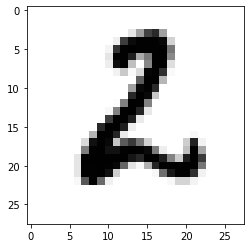

In [18]:
i=randint(1, x_test.shape[0])
print(i)
plt.imshow(x_test[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", model.predict_classes(x_test[i:i+2].reshape((1+2,28,28,1)))[0])
print("real value: ", argmax(y_test[i]))






In [24]:
model.predict_classes(x_test[i:i+100].reshape((100,28,28,1)))

array([2, 1, 9, 6, 0, 4, 6, 1, 7, 3, 8, 7, 2, 9, 6, 5, 8, 3, 5, 7, 1, 6,
       1, 0, 9, 6, 2, 5, 4, 2, 3, 4, 4, 6, 0, 0, 2, 0, 1, 2, 3, 4, 3, 6,
       7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 8, 4, 5, 6, 7, 8,
       9, 8, 6, 5, 0, 6, 8, 9, 4, 1, 9, 5, 3, 0, 4, 8, 9, 1, 4, 0, 5, 5,
       2, 1, 5, 4, 0, 7, 6, 0, 1, 7, 0, 6])

Average time for  4 [ms]:  1.4357829093933105
Average time for  8 [ms]:  1.413125991821289
Average time for  16 [ms]:  1.427903175354004
Average time for  32 [ms]:  1.5948724746704102
Average time for  64 [ms]:  2.8800439834594727
Average time for  128 [ms]:  5.533900260925293
Average time for  256 [ms]:  10.592615604400635


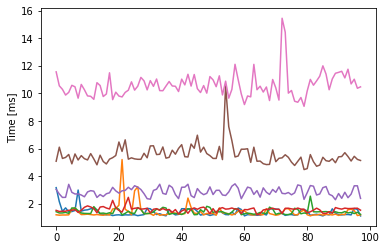

In [33]:
times=np.zeros((100,7))

for i in range(7):
  for x in range(100):
    start_time_one_batch=time.time()
    model.predict_classes(x_test[0:2**(i+2)].reshape((2**(i+2),28,28,1)))
    # sess.run(output_node, feed_dict={input_node: mnist.test.images[0:2**(i+2)], input_2: 1.0})
    end_time_one_batch=time.time()
    times[x,i]=((end_time_one_batch-start_time_one_batch)*1000)

plt.plot(times[2:,:])
plt.ylabel('Time [ms]')
for i in range(7):
    print('Average time for ',2**(i+2) ,'[ms]: ',sum(times[:,i])/len(times[:,i]))

In [34]:
for i in range(7):
    print(sum(times[:,i])/len(times[:,i]))

1.4357829093933105
1.413125991821289
1.427903175354004
1.5948724746704102
2.8800439834594727
5.533900260925293
10.592615604400635
